<a href="https://colab.research.google.com/github/annapinyaeva/SPPR/blob/main/%D0%9B%D0%B0%D0%B12/SPPR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
!pip install surprise
from surprise import *
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict
from surprise import accuracy
from sklearn.preprocessing import StandardScaler


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 3.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626465 sha256=520a8eed6fffe35d6eb95572484d972ef3e07ea7f768aa918023325f974ac49f
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [6]:
#Подключили файлы
rating = pd.read_csv('/rating.csv')
rating.head()



,user_id,anime_id,rating
0,1,20.0,-1.0
1,1,24.0,-1.0
2,1,79.0,-1.0
3,1,226.0,-1.0
4,1,241.0,-1.0


In [5]:
anime = pd.read_csv('/anime.csv')
anime.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
rating.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161719 entries, 0 to 161718
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   161719 non-null  int64  
 1   anime_id  161718 non-null  float64
 2   rating    161718 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.7 MB


In [8]:
reader = Reader(line_format='user item rating', sep="\t")
reader = Reader(rating_scale=(0.5, 5.0))
df = Dataset.load_from_df(rating, reader)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
rating.rating.unique()

array([-1., 10.,  8.,  6.,  9.,  7.,  3.,  5.,  4.,  1.,  2., nan])

In [11]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        
        
        '''))


In [ ]:
configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

data = rating["rating"].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / rating.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} ratings'.format(rating.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)
     


In [ ]:
configure_plotly_browser_state()


data = rating.groupby('anime_id')['rating'].count().clip(upper=50)
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Item (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [15]:
data.head()


anime_id
1.0    50
5.0    50
6.0    50
7.0    16
8.0     4
Name: rating, dtype: int64

In [16]:
configure_plotly_browser_state()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

In [17]:
type(data)

pandas.core.series.Series

In [18]:
type(df)

surprise.dataset.DatasetAutoFolds

In [19]:
# param_grid = {'n_factors': [25, 30, 35, 40], 'n_epochs': [15, 20, 25], 'lr_all': [0.001, 0.003, 0.005, 0.008],
#               'reg_all': [0.08, 0.1, 0.15]}

param_grid = {'n_factors': [25], 'n_epochs': [15], 'lr_all': [0.001, 0.003],
              'reg_all': [0.08, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, joblib_verbose = 432)

gs.fit(df)

algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Assigning values
t = gs.best_params
factors = t['rmse']['n_factors']
epochs = t['rmse']['n_epochs']
lr_value = t['rmse']['lr_all']
reg_value = t['rmse']['reg_all']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   16.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [20]:
trainset, testset = train_test_split(df, test_size=0.25)
algo = SVD(n_factors=40, n_epochs=25, lr_all=0.008, reg_all=0.08)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)


RMSE: 3.9854


3.985426704919057

In [21]:
def get_Iu(uid):
    """ 
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ 
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

    
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)
df_predictions.head()


,uid,iid,rui,est,details,Iu,Ui,err
0,256,8937.0,9.0,5.0,{'was_impossible': False},256,143,4.0
1,514,15225.0,9.0,5.0,{'was_impossible': False},142,161,4.0
2,514,822.0,9.0,5.0,{'was_impossible': False},142,3,4.0
3,1188,9617.0,-1.0,5.0,{'was_impossible': False},310,82,6.0
4,1132,31952.0,6.0,5.0,{'was_impossible': False},328,28,1.0


In [22]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]

temp = rating.loc[rating['anime_id'] == '0195153448']['rating']
configure_plotly_browser_state()

# Create trace
trace = go.Histogram(x = temp.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 5, size=.3))
 # Create layout
layout = go.Layout(title = 'Number of ratings item 3996 has received',
                   xaxis = dict(title = 'Number of Ratings Per Item'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [23]:
final = []

for threshold in np.arange(0, 5.5, 0.5):
    tp=0
    fn=0
    fp=0
    tn=0
    temp = []

    for uid, _, true_r, est, _ in predictions:
        if(true_r>=threshold):
            if(est>=threshold):
                tp = tp+1
            else:
                fn = fn+1
        else:
            if(est>=threshold):
                fp = fp+1
            else:
                tn = tn+1   

        if tp == 0:
            precision = 0
            recall = 0
            f1 = 0
        else:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1 = 2 * (precision * recall) / (precision + recall)  

    temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
    final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)
results

,threshold,tp,fp,tn,fn,Precision,Recall,F1
0,0.0,32044,8386,0,0,0.792580,1.0,0.884290
1,0.5,32044,8386,0,0,0.792580,1.0,0.884290
2,1.0,32044,8386,0,0,0.792580,1.0,0.884290
3,1.5,31958,8472,0,0,0.790453,1.0,0.882964
4,2.0,31958,8472,0,0,0.790453,1.0,0.882964
5,2.5,31854,8576,0,0,0.787880,1.0,0.881357
6,3.0,31854,8576,0,0,0.787880,1.0,0.881357
7,3.5,31673,8757,0,0,0.783403,1.0,0.878549
8,4.0,31673,8757,0,0,0.783403,1.0,0.878549
9,4.5,31222,9208,0,0,0.772248,1.0,0.871490


In [24]:
def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [25]:
results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=2.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

[{'K': 2, 'Precision': 0.8193249503639973, 'Recall': 0.3394593997254369},
 {'K': 3, 'Precision': 0.820097065960732, 'Recall': 0.4129374040070265},
 {'K': 4, 'Precision': 0.8208691815574675, 'Recall': 0.4689041041432912},
 {'K': 5, 'Precision': 0.8203728215309933, 'Recall': 0.5127303334524959},
 {'K': 6, 'Precision': 0.8194904037061554, 'Recall': 0.551999168562131},
 {'K': 7, 'Precision': 0.8206091834483635, 'Recall': 0.5878304374453256},
 {'K': 8, 'Precision': 0.8207982729822572, 'Recall': 0.61808282501911},
 {'K': 9, 'Precision': 0.8208350403916271, 'Recall': 0.6452852038557135},
 {'K': 10, 'Precision': 0.8210115239565928, 'Recall': 0.6688734885057507}]

In [26]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


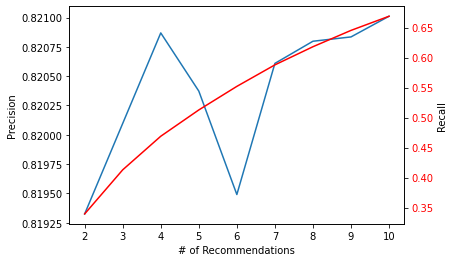

In [27]:
Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

from matplotlib import pyplot as plt
plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')

In [28]:
trainset = df.build_full_trainset()   #Build on entire data set
testset = trainset.build_testset()
algo = SVD(n_factors= 25, n_epochs= 15, lr_all= 0.003, reg_all= 0.08)
algo.fit(trainset)

# Predict ratings for all pairs (u, i) that are NOT in the training set.


#Predicting the ratings for testset
predictions = algo.test(testset)

In [29]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [30]:
all_pred = get_all_predictions(predictions)

In [31]:
n = 4

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [32]:
tmp = pd.DataFrame.from_dict(all_pred,orient='index')
tmp_transpose = tmp.transpose()
tmp

,0,1,2,3
1,"(20.0, 5.0)","(24.0, 5.0)","(79.0, 5.0)","(226.0, 5.0)"
2,"(11771.0, 5.0)","(12189.0, 5.0)","(16417.0, 5.0)",None
3,"(20.0, 5.0)","(154.0, 5.0)","(170.0, 5.0)","(199.0, 5.0)"
4,"(6.0, 5.0)","(72.0, 5.0)","(121.0, 5.0)","(150.0, 5.0)"
5,"(6.0, 5.0)","(15.0, 5.0)","(17.0, 5.0)","(18.0, 5.0)"
...,...,...,...,...
1598,"(61.0, 5.0)","(64.0, 5.0)","(66.0, 5.0)","(74.0, 5.0)"
1599,"(3407.0, 5.0)","(6547.0, 5.0)","(10793.0, 5.0)","(11757.0, 5.0)"
1600,"(19.0, 5.0)","(20.0, 5.0)","(114.0, 5.0)","(154.0, 5.0)"
1601,"(1.0, 5.0)","(30.0, 5.0)","(32.0, 5.0)","(164.0, 5.0)"


In [33]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id ]
    return results

In [34]:
results = get_predictions(2)
results

1          (79.0, 5.0)
2       (16417.0, 5.0)
3         (170.0, 5.0)
4         (121.0, 5.0)
5          (17.0, 5.0)
             ...      
1598       (66.0, 5.0)
1599    (10793.0, 5.0)
1600      (114.0, 5.0)
1601       (32.0, 5.0)
1602      (237.0, 5.0)
Name: 2, Length: 1602, dtype: object

In [35]:
recommended_anime_ids=[]
for x in range(1, n+1):
      recommended_anime_ids.append(results[x][0])

recommended_anime_ids

[79.0, 16417.0, 170.0, 121.0]

In [36]:
anime.head()
recommended_anime = anime[anime['anime_id'].isin(recommended_anime_ids)]

In [37]:
recommended_anime


,anime_id,name,genre,type,episodes,rating,members
79,170,Slam Dunk,"Comedy, Drama, School, Shounen, Sports",TV,101,8.56,82570
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
2133,16417,Tamako Market,"Comedy, Slice of Life",TV,12,7.35,128529
2281,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772


In [38]:
temp = rating[rating['user_id'] == 25].sort_values("rating", ascending = False)
temp.head()

,user_id,anime_id,rating
2631,25,10793.0,10.0
2614,25,2167.0,10.0
2615,25,2904.0,10.0
2616,25,4181.0,10.0
2643,25,14813.0,10.0


In [39]:
temp.shape

(38, 3)

In [40]:
history_anime_ids = temp['anime_id']
user_history = anime[anime['anime_id'].isin(history_anime_ids)]

In [41]:
user_history[:n]

,anime_id,name,genre,type,episodes,rating,members
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917


In [42]:
recommended_anime

,anime_id,name,genre,type,episodes,rating,members
79,170,Slam Dunk,"Comedy, Drama, School, Shounen, Sports",TV,101,8.56,82570
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
2133,16417,Tamako Market,"Comedy, Slice of Life",TV,12,7.35,128529
2281,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
